In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.spatial import distance

In [4]:
data = '''id,X,Y,Class
1,96,95,0
2,15,17,0
3,85,76,0
4,70,37,0
5,64,64,0
6,62,24,1
7,48,45,1
8,75,99,1
9,95,58,0
10,50,34,0
'''
train_data = pd.read_csv(io.StringIO(data), index_col='id')
train_data

,X,Y,Class
id,,,
1,96,95,0
2,15,17,0
3,85,76,0
4,70,37,0
5,64,64,0
6,62,24,1
7,48,45,1
8,75,99,1
9,95,58,0


Отбор данных для предикторов, удаление столбца Class

In [5]:
X = train_data.drop(['Class'], axis=1)

Отбор столбца Class для отклика

In [6]:
y = train_data['Class']

Подключение библиотеки и задание параметров модели:

n_neighbors — число соседей;
p — используемое расстояние.
Манхэттенское расстояние — p=1, евклидово расстояние — p=2. Дополнительные параметры

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем объект класса KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3, p = 2)

# Обучаем классификатор на тренировочных данных
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Новый объект, который необходимо классифицировать

In [9]:
import numpy as np

NewObject = np.array([39, 22])

Назначенный класс

In [10]:
neigh.predict([NewObject])

array([0])

Вероятности отнесения к классам 0 и 1 соответственно:

In [11]:
neigh.predict_proba([NewObject])

array([[0.66666667, 0.33333333]])

Вывод расстояний до 𝑘 соседей в порядке удаления (первый массив — расстояния, второй — идентификаторы объектов). Обращаем внимание, что метод возвращает индексы ближайших соседей с нуля, что не соответствует индексации в таблице.

In [12]:
neigh.kneighbors([NewObject])

(array([[16.2788206 , 23.08679276, 24.51530134]]), array([[9, 5, 1]]))

Получены индексы [9, 5, 1], значит id = [10, 6, 2]

Визуализируем полученные результаты

Text(38, 24, 'NewObject')

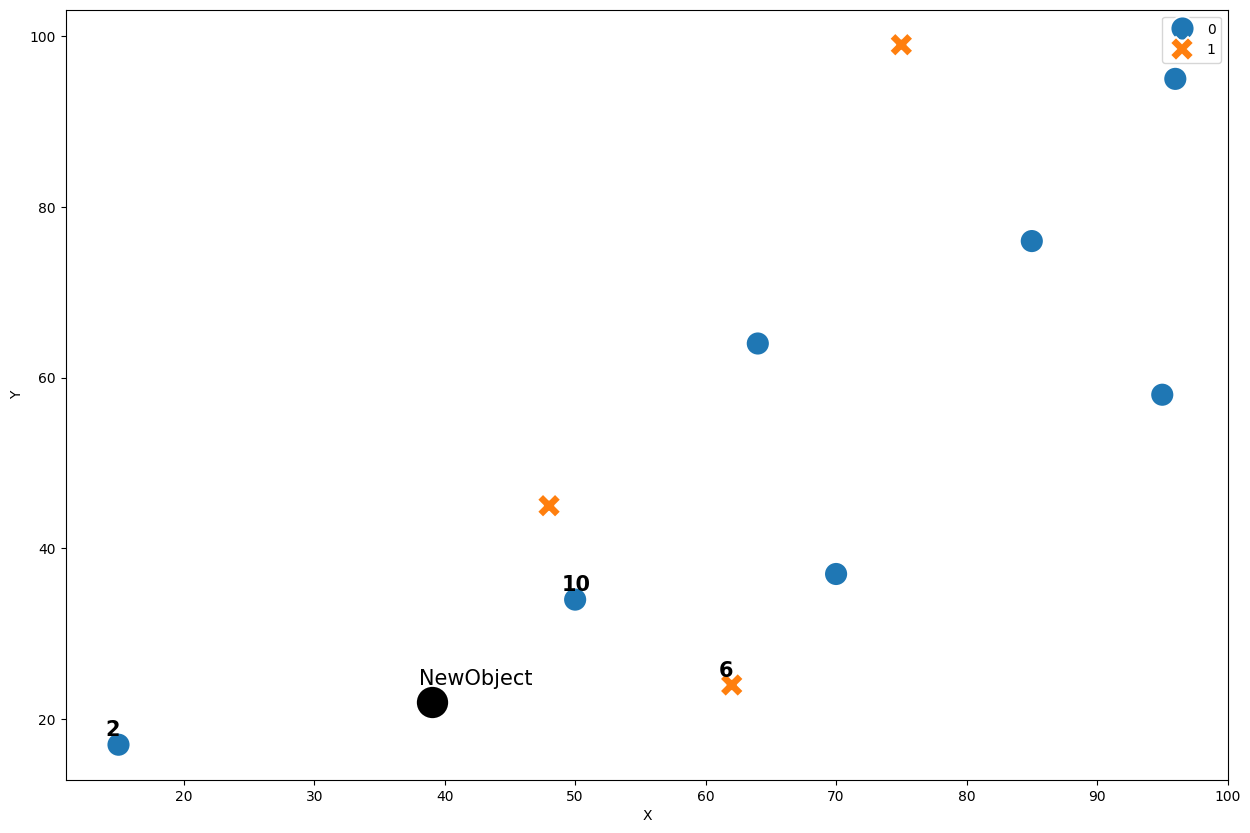

In [14]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Установим размер изображения
plt.rcParams["figure.figsize"] = (15,10)


# Строим тренировочные данные
sns.scatterplot(x=train_data.X, y=train_data.Y, style = train_data.Class, hue=train_data.Class, s=300)
# Строим тестовый объект
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')

# Добавляем аннотации (id объекта) для ближайших соседей
for i in neigh.kneighbors([NewObject])[1].ravel():
    plt.annotate(str(i+1), (train_data.X.iloc[i], train_data.Y.iloc[i]), xytext = (train_data.X.iloc[i]-1, train_data.Y.iloc[i]+1), fontsize=15, weight='bold')
# Добавляем аннотацию для тестового объекта
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)